In [1]:
## Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
## read CSV file
df = pd.read_csv(r"E:\New folder\school\schools.csv")
### count the number of NaN
# df.isna().sum()
#drop rows that consist of atleast one NaN
df=df.dropna()

## Total SAT score 
df["total_SAT"] = df["average_math"] + df["average_reading"] + df["average_writing"]
df.head()

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested,total_SAT
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9,1193
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1,1261
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9,1529
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7,1197
5,Bard High School Early College,Manhattan,M097,634,641,639,70.8,1914


In [3]:
# Who are the top 10 performing schools?
top_ten_school = df[["school_name", "borough","total_SAT"]].sort_values(by="total_SAT", ascending=False)
top_ten_school.head(10)

,school_name,borough,total_SAT
88,Stuyvesant High School,Manhattan,2144
170,Bronx High School of Science,Bronx,2041
93,Staten Island Technical High School,Staten Island,2041
174,High School of American Studies at Lehman College,Bronx,2013
333,Townsend Harris High School,Queens,1981
365,Queens High School for the Sciences at York Co...,Queens,1947
5,Bard High School Early College,Manhattan,1914
280,Brooklyn Technical High School,Brooklyn,1896
45,Eleanor Roosevelt High School,Manhattan,1889
68,"High School for Mathematics, Science, and Engi...",Manhattan,1889


In [4]:
# number of schools, average number of each borough and min-max of borough
borough = df.groupby("borough")[["total_SAT",'average_math']].agg(["count", "mean", "max", "min"]).round(2).sort_values(('total_SAT', 'mean'), ascending=False)
borough

total_SAT                      average_math                  
                  count     mean   max   min        count    mean  max  min
borough                                                                    
Staten Island         9  1438.22  2041  1258            9  485.33  711  420
Queens               65  1348.58  1981   978           65  463.75  701  340
Manhattan            84  1338.67  2144  1005           84  455.24  754  344
Brooklyn            104  1232.86  1896   946          104  417.37  682  326
Bronx                93  1206.66  2041   924           93  405.12  714  317

In [5]:
## schools with total sat score that considered as outliers
avg_rd = df["total_SAT"] 
q1 = np.quantile(avg_rd, .25)
q3 = np.quantile(avg_rd , .75)
iqr = q3 - q1
# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1 * iqr
upper = q3 + 3.5 * iqr
outliers = df[(df["total_SAT"] < lower) | (df["total_SAT"] > upper)]
outliers[["school_name", "borough", "total_SAT"]].sort_values("total_SAT", ascending=False)

,school_name,borough,total_SAT
88,Stuyvesant High School,Manhattan,2144
93,Staten Island Technical High School,Staten Island,2041
170,Bronx High School of Science,Bronx,2041
174,High School of American Studies at Lehman College,Bronx,2013
333,Townsend Harris High School,Queens,1981
337,Pan American International High School,Queens,978
295,International High School at Prospect Heights,Brooklyn,946
182,Pan American International High School at Monroe,Bronx,924


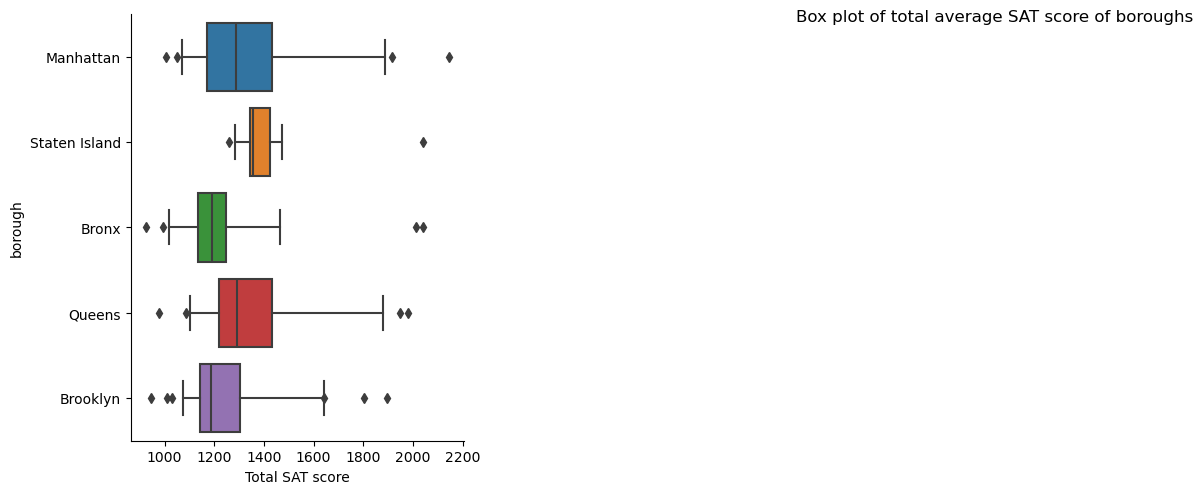

In [13]:
f=sns.catplot(y='borough', x='total_SAT', data=df, kind='box', whis=[2, 98])
f.fig.suptitle("Box plot of total average SAT score of boroughs", x = 2)
f.set(xlabel="Total SAT score")
plt.show()

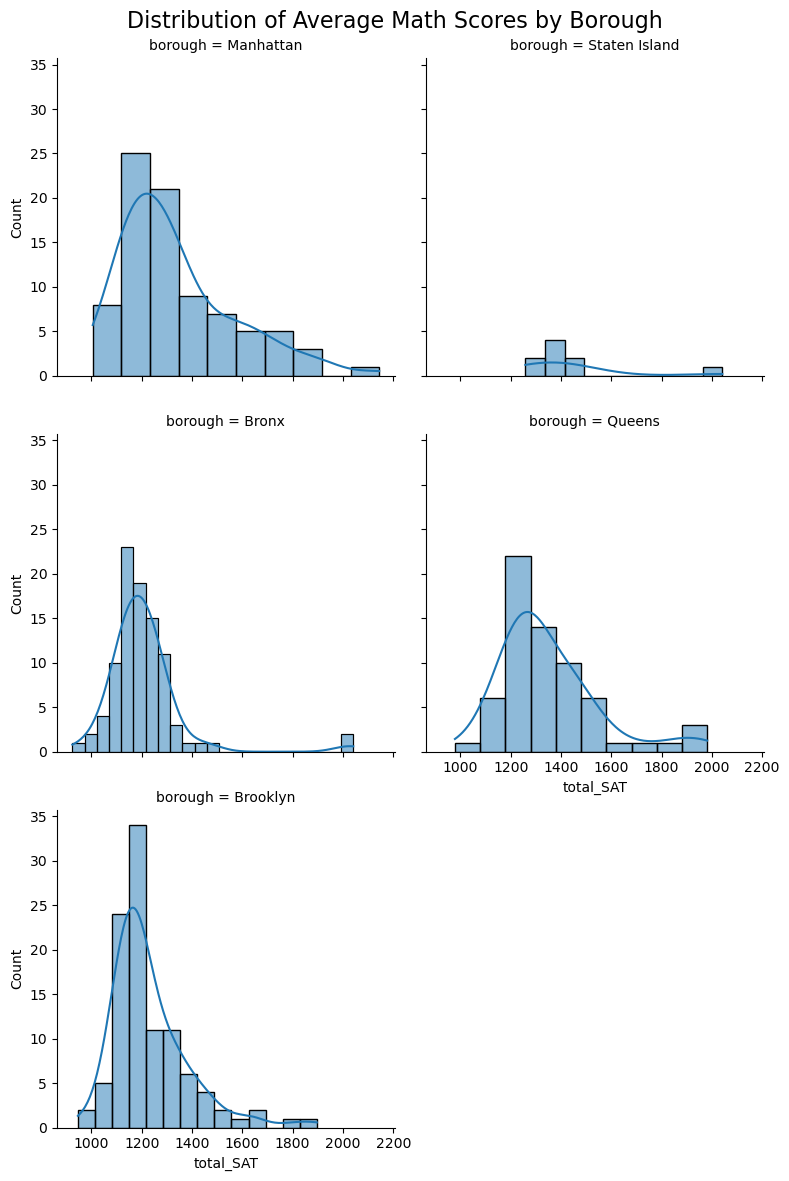

In [7]:
g = sns.FacetGrid(df, col='borough', col_wrap=2, height=4, sharex=True, sharey=True)
g.map(sns.histplot, 'total_SAT', kde=True)
g.fig.suptitle("Distribution of Average Math Scores by Borough", fontsize=16)
g.tight_layout()


In [8]:
# Top 5 schools that score best in math
best_math_schools = df[df["average_math"] >= 800*(80/100)][["school_name", "average_math"]].sort_values(by="average_math", ascending=False)
best_math_schools.head(5)

,school_name,average_math
88,Stuyvesant High School,754
170,Bronx High School of Science,714
93,Staten Island Technical High School,711
365,Queens High School for the Sciences at York Co...,701
68,"High School for Mathematics, Science, and Engi...",683


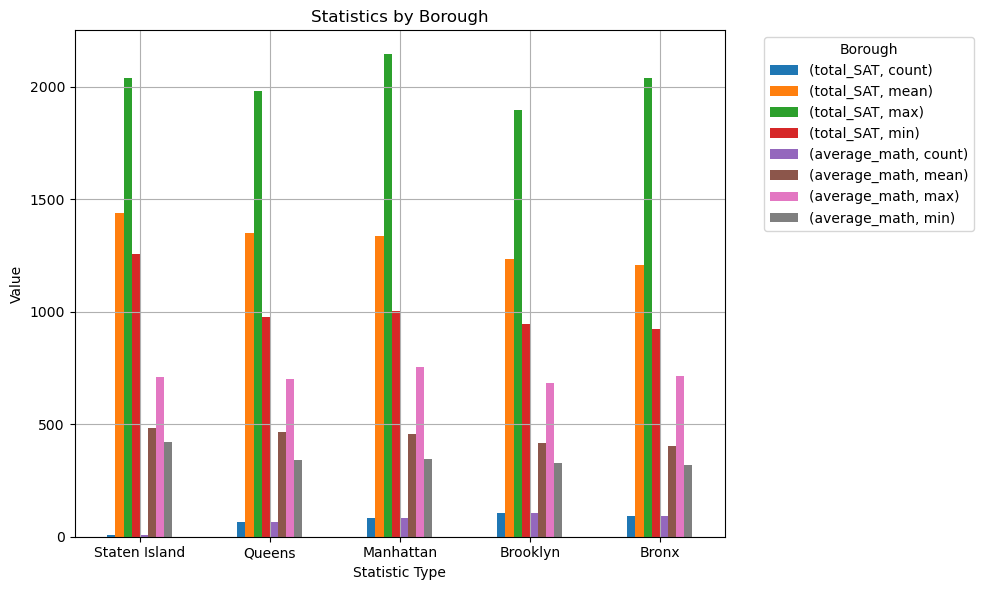

In [9]:
# Plot grouped bar chart
borough.plot(kind='bar', figsize=(10, 6))
plt.title('Statistics by Borough')
plt.grid(True)
plt.ylabel('Value')
plt.xlabel('Statistic Type')
plt.xticks(rotation=0)
plt.legend(title='Borough', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

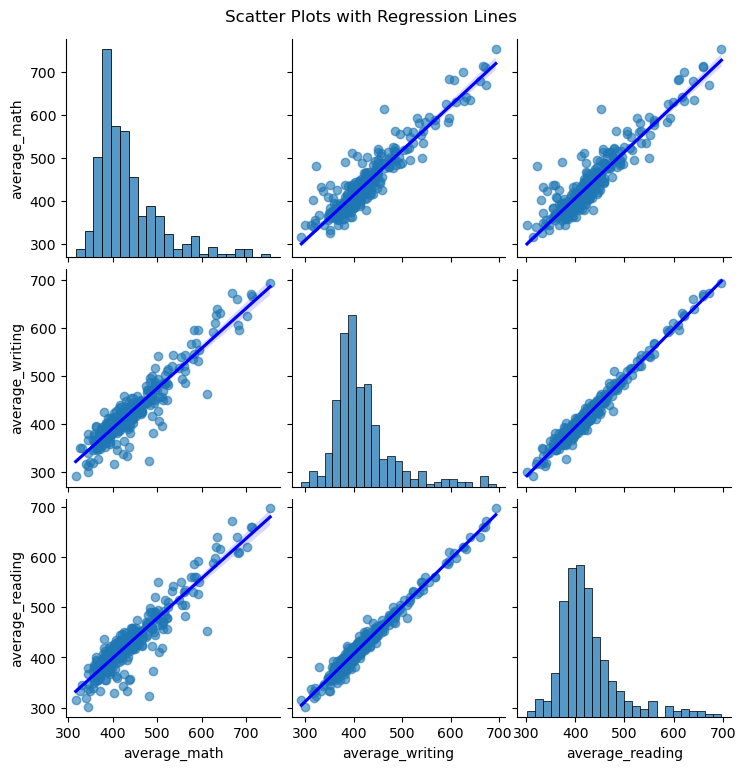

In [10]:
# Correlation among Math, Writing and Reading Score
sns.pairplot(
    df[['average_math', 'average_writing', 'average_reading']],
    kind='reg', # regression line
    plot_kws={'line_kws':{'color':'blue'}, 'scatter_kws': {'alpha':0.6}}
)
plt.suptitle("Scatter Plots with Regression Lines", y=1.02)
plt.show()

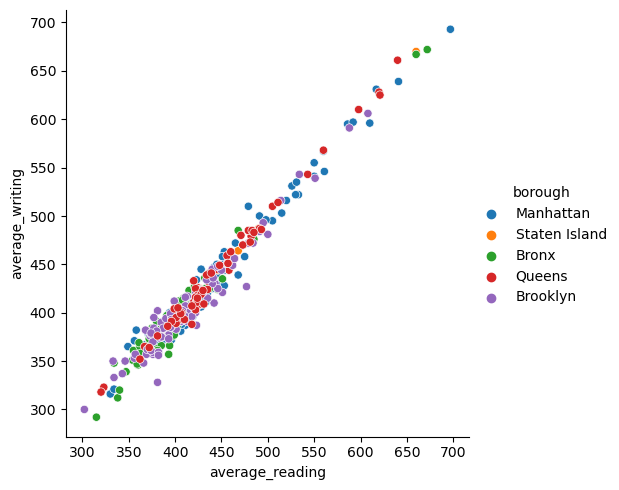

In [11]:
sns.relplot(x="average_reading", y="average_writing", 
            data=df,
            kind="scatter", 
            hue="borough")

# Show plot
plt.show()